In [1]:
import sys
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib.animation as animation
import scipy as sc
import seaborn as sns

## Fonctions utiles

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
n_runs = len(meta)
n_wins = 464
dfc_train_propofol = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_test_propofol = dfc[(meta["monkey"] == "jade") & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_all = dfc.reshape((-1, n_wins, 82, 82))
dfc_train_background = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana'])].reshape((-1, n_wins, 82, 82))
dfc_test_background = dfc[(meta["monkey"] == "jade")].reshape((-1, n_wins, 82, 82))
conditions_train = meta["condition"][meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
conditions_test = meta["condition"][meta["monkey"].isin(['jade']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
dict_conditions = {"light-propofol":0, "deep-propofol":1}
labels_train = [dict_conditions[elem] for elem in conditions_train]
labels_test = [dict_conditions[elem] for elem in conditions_test]

KeyboardInterrupt: 

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/dfc.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/meta.csv")
iu = np.triu_indices(82,k=1)
dfc_flat = dfc[:,:,iu[0],iu[1]]

id_sessions_awake = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "awake"]
id_sessions_light_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "light-propofol"]
id_sessions_deep_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "deep-propofol"]
id_sessions_light_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2"]
id_sessions_deep_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4"]

In [4]:
id_sessions_almira = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "almira" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_jade = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "jade" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_khali = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "khali" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_kimiko = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "kimiko" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_rana = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "rana" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]

In [5]:
id_sessions_awake = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "awake"]
id_sessions_light_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "light-propofol"]
id_sessions_deep_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "deep-propofol"]
id_sessions_light_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2"]
id_sessions_deep_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4"]

## Méthode du papier

### Deep vs Light propofol

In [24]:
id_sessions_sevoflurane = np.concatenate([id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane]).astype(int)
id_sessions_awake_sevoflurane = np.concatenate([id_sessions_awake,id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane]).astype(int)
id_sessions_propofol = np.concatenate([id_sessions_light_propofol,id_sessions_deep_propofol]).astype(int)
id_sessions_awake_propofol = np.concatenate([id_sessions_awake,id_sessions_light_propofol,id_sessions_deep_propofol]).astype(int)
id_sessions_subject = np.concatenate([id_sessions_almira,id_sessions_rana,id_sessions_jade,id_sessions_khali,id_sessions_kimiko]).astype(int)
X = dfc_flat[id_sessions_sevoflurane,:,:].reshape(-1,3321)
labels_X = ["light-sevoflurane"]*461*len(id_sessions_light_sevoflurane) + ["deep-sevoflurane"]*461*len(id_sessions_deep_sevoflurane)
Y_light_sevoflurane = dfc_flat[id_sessions_light_sevoflurane,:,:].reshape(-1,3321)
Y_deep_sevoflurane = dfc_flat[id_sessions_deep_sevoflurane,:,:].reshape(-1,3321)
labels_Y_light_sevoflurane = np.concatenate([[meta["monkey"].iloc[i]]*461 for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2"])
labels_Y_deep_sevoflurane = np.concatenate([[meta["monkey"].iloc[i]]*461 for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4"])
labels_X_subjects = np.concatenate([labels_Y_light_sevoflurane,labels_Y_deep_sevoflurane])
labels_subjects_X = ['almira']*461*len(id_sessions_almira) + ["jade"]*461*len(id_sessions_jade) + ["khali"]*461*len(id_sessions_khali) + ["kimiko"]*461*len(id_sessions_kimiko) + ["rana"]*461*len(id_sessions_rana)

In [7]:
alpha = 10

C_X = ((X-np.mean(X,axis = 0)).T @ (X - np.mean(X,axis = 0))) / X.shape[0]
C_Y_light_sevoflurane = ((Y_light_sevoflurane-np.mean(Y_light_sevoflurane,axis=0)).T @ (Y_light_sevoflurane-np.mean(Y_light_sevoflurane,axis=0))) / Y_light_sevoflurane.shape[0]
C_Y_deep_sevoflurane = ((Y_deep_sevoflurane-np.mean(Y_deep_sevoflurane,axis=0)).T @ (Y_deep_sevoflurane-np.mean(Y_deep_sevoflurane,axis=0))) / Y_deep_sevoflurane.shape[0]

C = C_X - alpha * (C_Y_light_sevoflurane + C_Y_deep_sevoflurane)

In [8]:
eig = np.linalg.eig(C)
w, v = eig
n_components = 10
eig_idx = np.argpartition(w, -n_components)[-n_components:]
eig_idx = eig_idx[np.argsort(-np.abs(w[eig_idx]))]
v_top = v[:,eig_idx]
X_reduced = (X-np.mean(X,axis = 0)).dot(v_top)
Y_light_sevoflurane_reduced = (Y_light_sevoflurane-np.mean(Y_light_sevoflurane,axis = 0)).dot(v_top)
Y_deep_sevoflurane_reduced = (Y_deep_sevoflurane-np.mean(Y_deep_sevoflurane,axis = 0)).dot(v_top)
#reduced_dataset[:,0] = reduced_dataset[:,0]*np.sign(reduced_dataset[0,0])
#reduced_dataset[:,1] = reduced_dataset[:,1]*np.sign(reduced_dataset[0,1])

In [11]:
np.sort(w)

array([-3.22639953e+02, -2.01491842e+02, -1.56996385e+02, ...,
       -2.00994005e-03, -1.99604344e-03,  5.16596267e-01])

In [10]:
w[eig_idx]

array([ 0.51659627, -0.00225947, -0.00224184, -0.00223635, -0.00222054,
       -0.00217281, -0.00215058, -0.00209578, -0.00200994, -0.00199604])

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

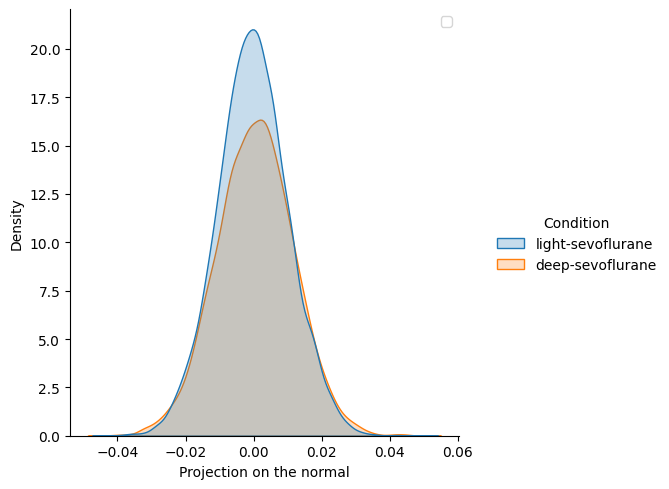

In [29]:
df_val = pd.DataFrame.from_dict({"val" : X_reduced[:,2].flatten()})
df_cond = pd.DataFrame.from_dict({"condition" : labels_X})

db_train = pd.concat([df_val,df_cond],axis = 1)
db_train.columns = ["Projection on the normal","Condition"]

fig = plt.figure(figsize=(15,10))

sns.displot(data = db_train, x = "Projection on the normal", hue = "Condition", kind="kde",  fill=True, color="g")

plt.legend()
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

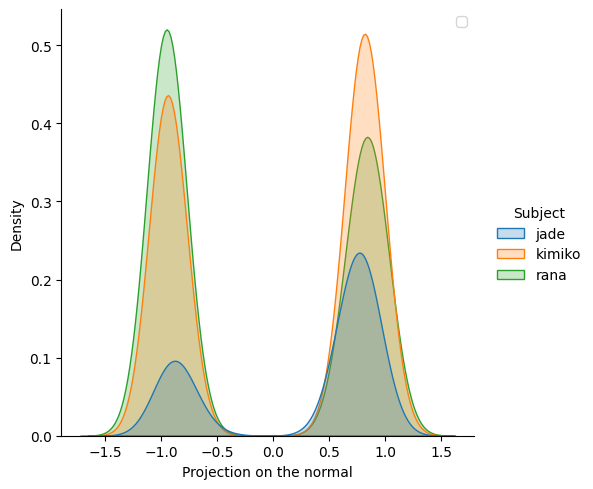

In [25]:
df_val = pd.DataFrame.from_dict({"val" : X_reduced[:,0].flatten()})
df_cond = pd.DataFrame.from_dict({"condition" : labels_X_subjects})

db_train = pd.concat([df_val,df_cond],axis = 1)
db_train.columns = ["Projection on the normal","Subject"]

fig = plt.figure(figsize=(15,10))

sns.displot(data = db_train, x = "Projection on the normal", hue = "Subject", kind="kde",  fill=True, color="g")

plt.legend()
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

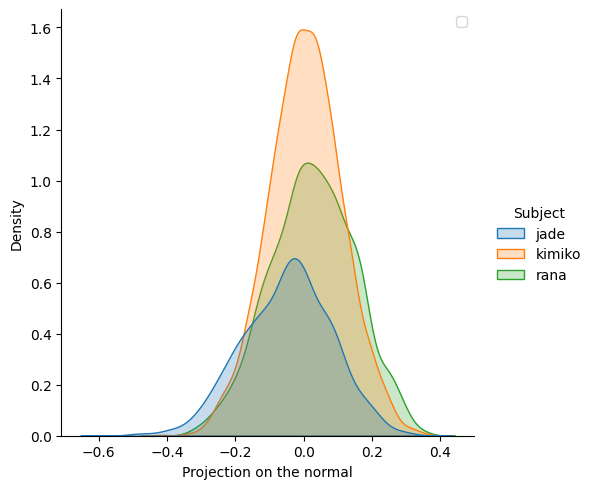

In [20]:
df_val = pd.DataFrame.from_dict({"val" : Y_light_sevoflurane_reduced[:,0].flatten()})
df_cond = pd.DataFrame.from_dict({"condition" : labels_Y_light_sevoflurane})

db_train = pd.concat([df_val,df_cond],axis = 1)
db_train.columns = ["Projection on the normal","Subject"]

fig = plt.figure(figsize=(15,10))

sns.displot(data = db_train, x = "Projection on the normal", hue = "Subject", kind="kde",  fill=True, color="g")

plt.legend()
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

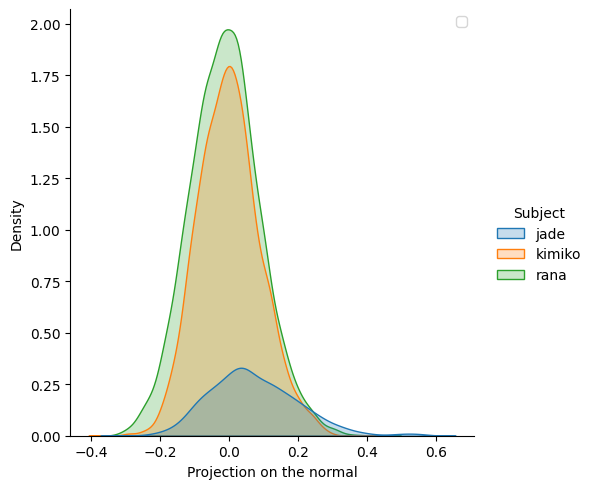

In [22]:
df_val = pd.DataFrame.from_dict({"val" : Y_deep_sevoflurane_reduced[:,0].flatten()})
df_cond = pd.DataFrame.from_dict({"condition" : labels_Y_deep_sevoflurane})

db_train = pd.concat([df_val,df_cond],axis = 1)
db_train.columns = ["Projection on the normal","Subject"]

fig = plt.figure(figsize=(15,10))

sns.displot(data = db_train, x = "Projection on the normal", hue = "Subject", kind="kde",  fill=True, color="g")

plt.legend()
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

Text(0.5, 1.0, 'component 0')

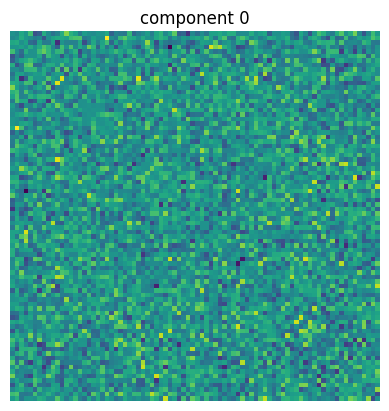

In [27]:
im = np.zeros((82,82))
iu = np.triu_indices(82,k=1)
il = np.tril_indices(82,k=-1)
im[iu[0],iu[1]] = v_top[:,0]
im = np.transpose(im)
im[iu[0],iu[1]] = v_top[:,0]
plt.imshow(im)
plt.axis("off")
plt.title(label="component {}".format(0))

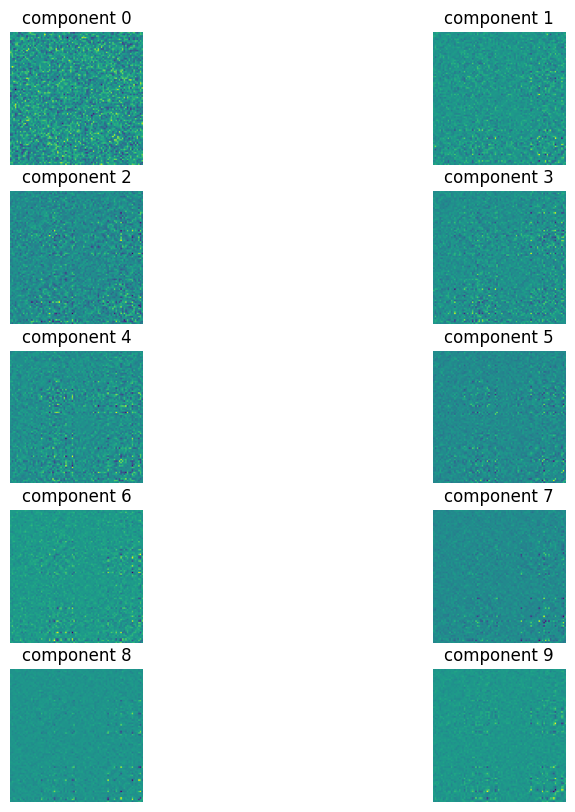

In [15]:
fig = plt.figure(figsize=(10,10))

for i in range(10):
    im = np.zeros((82,82))
    iu = np.triu_indices(82,k=1)
    il = np.tril_indices(82,k=-1)
    im[iu[0],iu[1]] = v_top[:,i]
    im = np.transpose(im)
    im[iu[0],iu[1]] = v_top[:,i]
    fig.add_subplot(5,2,i+1)
    plt.imshow(im)
    plt.axis("off")
    plt.title(label="component {}".format(i))
plt.show()

In [186]:
dfc_reduced_sessions = dfc_reduced.reshape(-1,461,10)

In [194]:
dfc_reduced_sessions.shape

(74, 461, 10)

In [197]:
k

20

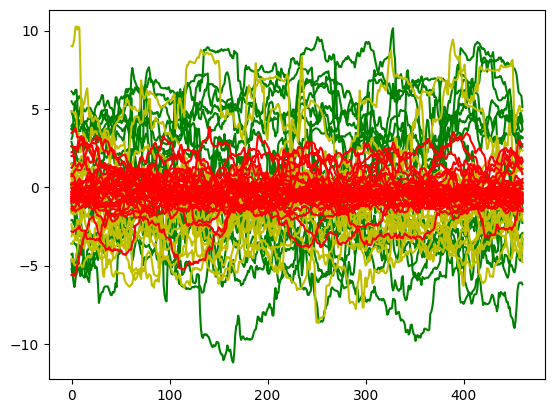

In [213]:
for i in range(dfc_reduced_sessions.shape[0]):
    if i < k:
        plt.plot(dfc_reduced_sessions[i,:,4],color="g")
    elif k <= i and i < n+k:
        plt.plot(dfc_reduced_sessions[i,:,4],color="y")
    else : 
        plt.plot(dfc_reduced_sessions[i,:,4],color="r")
plt.show()